In [24]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [25]:
np.random.seed(42)

### Train 데이터 만들기

In [26]:
single_data_point = np.random.randint(0, 100, 2)
single_data_point

array([51, 92])

In [27]:
single_label = np.random.randint(0, 2)
single_label

0

In [28]:
def generate_data(num_samples, num_features =2):
    data_size = (num_samples, num_features)
    data = np.random.randint(0, 100, size = data_size)
    
    labels_size = (num_samples, 1)
    labels = np.random.randint(0 ,2, size=labels_size)
    return data.astype(np.float32), labels

In [29]:
train_data, labels = generate_data(11)
train_data

array([[71., 60.],
       [20., 82.],
       [86., 74.],
       [74., 87.],
       [99., 23.],
       [ 2., 21.],
       [52.,  1.],
       [87., 29.],
       [37.,  1.],
       [63., 59.],
       [20., 32.]], dtype=float32)

In [30]:
train_data[0]

array([71., 60.], dtype=float32)

In [31]:
train_data[0, 0]

71.0

In [32]:
labels

array([[1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1]])

Text(0,0.5,'y coordinate')

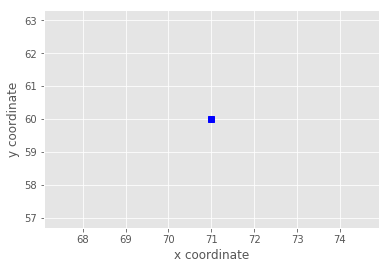

In [33]:
plt.plot(train_data[0, 0], train_data[0, 1], 'sb')
plt.xlabel('x coordinate')
plt.ylabel('y coordinate')

In [34]:
def plot_data(all_blue, all_red):
    plt.scatter(all_blue[:, 0], all_blue[:, 1], c='b', marker='s', s=180)
    plt.scatter(all_red[:, 0], all_red[:, 1], c='r', marker='^', s=180)
    plt.xlabel('x coordinate (feature 1)')
    plt.ylabel('y coordinate (feature 2)')

In [35]:
labels.ravel() == 0 

array([False, False, False,  True, False,  True,  True,  True,  True,
        True, False])

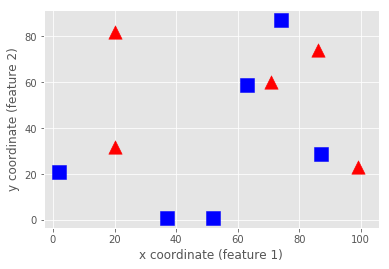

In [36]:
blue = train_data[labels.ravel() == 0]
red = train_data[labels.ravel() == 1]
plot_data(blue, red)

### k-NN 알고리듬

In [37]:
knn = cv2.ml.KNearest_create()

In [39]:
# telling knn that our data is N x 2 array 
knn.train(train_data, cv2.ml.ROW_SAMPLE, labels)

True

In [40]:
newdata, _ = generate_data(1)
newdata

array([[91., 59.]], dtype=float32)

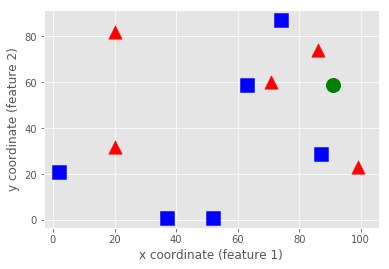

In [41]:
plot_data(blue, red)
plt.plot(newdata[0,0], newdata[0, 1], 'go', markersize=14)

#### k 가 1일 때 

In [42]:
ret, results, neighbor, dist = knn.findNearest(newdata, 1)

In [46]:
print('Predicted label: \t', results)
print("Neighbor's label: \t", neighbor)
print("Distance to neighbor: \t", dist)

Predicted label: 	 [[1.]]
Neighbor's label: 	 [[1.]]
Distance to neighbor: 	 [[250.]]


In [ ]:
# label의 카테고리는 1이다. 가장 가까운 데이터는 카테고리 1이다. 가장 가까운 데이터와의 거리는 250이다 

#### k 가 7일 때

In [49]:
ret, results, neighbor, dist = knn.findNearest(newdata, 7)

In [50]:
print('Predicted label: \t', results)
print("Neighbor's label: \t", neighbor)
print("Distance to neighbor: \t", dist)

Predicted label: 	 [[0.]]
Neighbor's label: 	 [[1. 1. 0. 0. 0. 1. 0.]]
Distance to neighbor: 	 [[ 250.  401.  784.  916. 1073. 1360. 4885.]]
